C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



=== KNN ===
Accuracy: 0.8918 Precision: 0.8032 Recall: 0.8300 F1: 0.8164

Confusion Matrix:
[[674  61]
 [ 51 249]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9297    0.9170    0.9233       735
           1     0.8032    0.8300    0.8164       300

    accuracy                         0.8918      1035
   macro avg     0.8664    0.8735    0.8698      1035
weighted avg     0.8930    0.8918    0.8923      1035


=== SVM (LinearSVC) ===
Accuracy: 0.9797 Precision: 0.9604 Recall: 0.9700 F1: 0.9652

Confusion Matrix:
[[723  12]
 [  9 291]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9877    0.9837    0.9857       735
           1     0.9604    0.9700    0.9652       300

    accuracy                         0.9797      1035
   macro avg     0.9741    0.9768    0.9754      1035
weighted avg     0.9798    0.9797    0.9797      1035



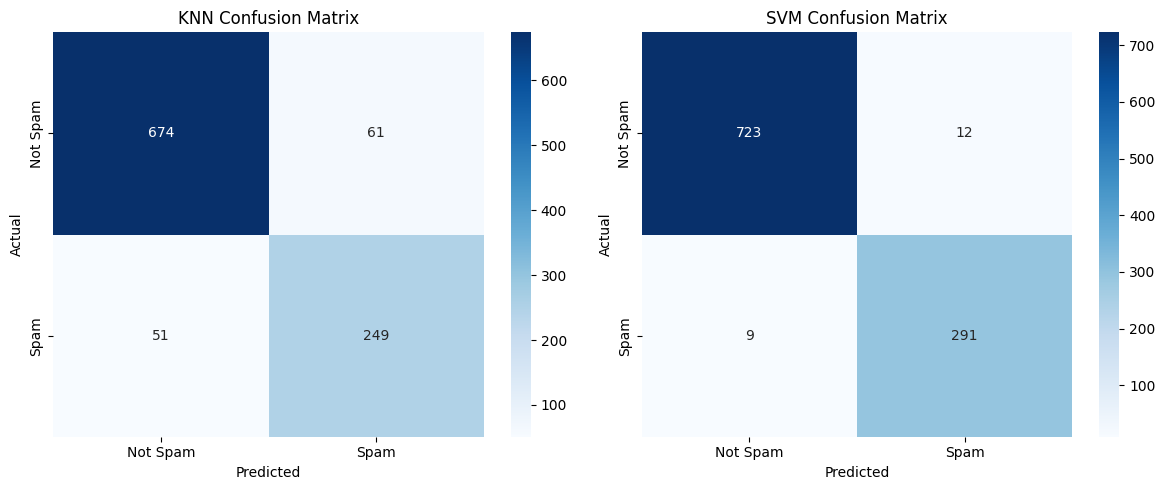

In [1]:
# --- Setup ---

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load data (ensure emails.csv is in the working directory)
df = pd.read_csv('emails.csv') # expected columns include 'text' and 'spam'
# (0 = not spam, 1 = spam)

# Drop rows with missing values (based on previous successful execution)
df.dropna(inplace=True)

# 2) Define Features (X) and Target (y) using word count data
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

# 3) Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
    stratify=y # Stratify based on the target variable
)

# 4) Initialize Models (without TfidfVectorizer)
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance',
                                 metric='cosine')

svm_clf = LinearSVC(C=1.0)


# 5) Train
knn_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

# 6) Predict
y_pred_knn = knn_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

# 7) Metrics
def summarize(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n=== {name} ===")

    print(f"Accuracy: {acc:.4f} Precision: {prec:.4f} Recall: {rec:.4f} F1: {f1:.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    return cm # Return confusion matrix for visualization


cm_knn = summarize(y_test, y_pred_knn, "KNN")
cm_svm = summarize(y_test, y_pred_svm, "SVM (LinearSVC)")


# 8) Visualize Confusion Matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()